In [1]:
# 1. Importar bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# 2. Carregar a base de dados
iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['target'] = y
df['target_name'] = df['target'].apply(lambda i: iris.target_names[i])


In [4]:
# Visualizar os 5 primeiros registros
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


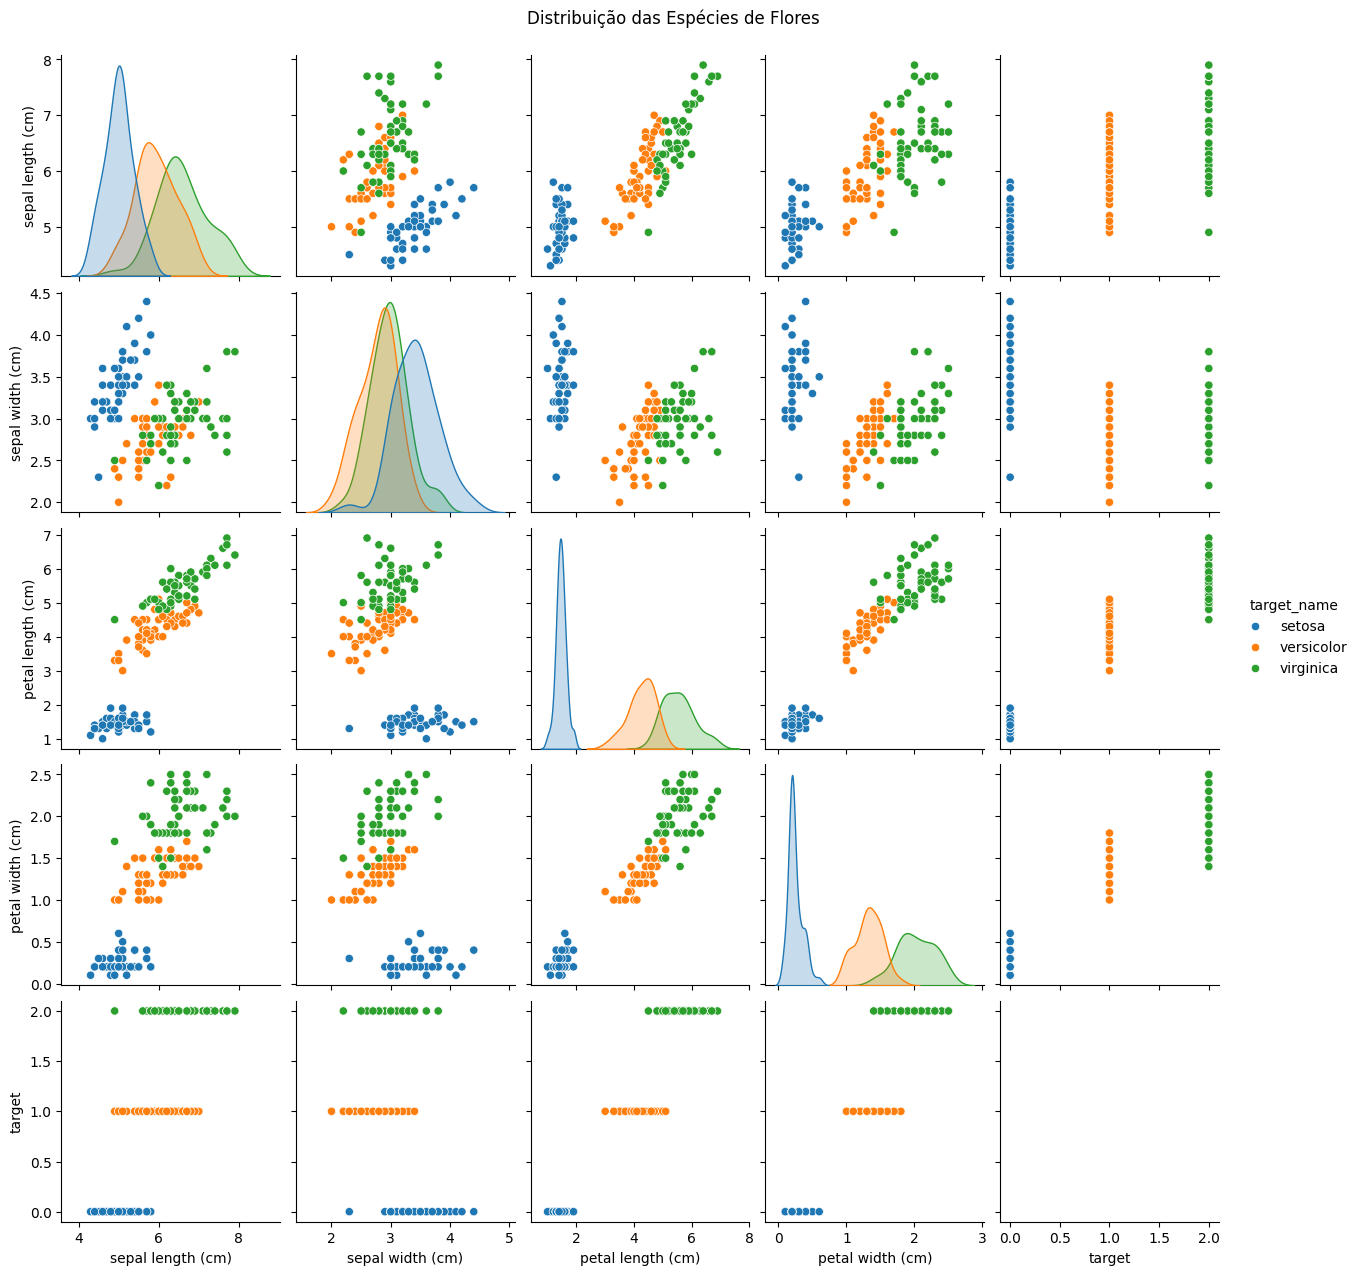

In [5]:
# 3. Análise visual dos dados
sns.pairplot(df, hue='target_name')
plt.suptitle("Distribuição das Espécies de Flores", y=1.02)
plt.show()

In [6]:
# 4. Separar dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [8]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("🔍 Árvore de Decisão")
print("Acurácia:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

🔍 Árvore de Decisão
Acurácia: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [9]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("🔍 KNN")
print("Acurácia:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


🔍 KNN
Acurácia: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [10]:
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("🔍 Regressão Logística")
print("Acurácia:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

🔍 Regressão Logística
Acurácia: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



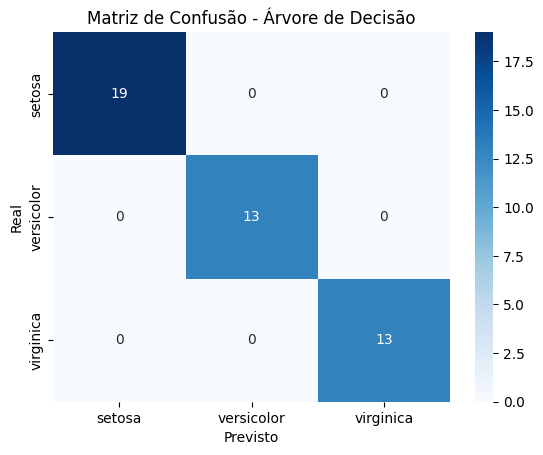

In [11]:
conf_matrix = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.show()


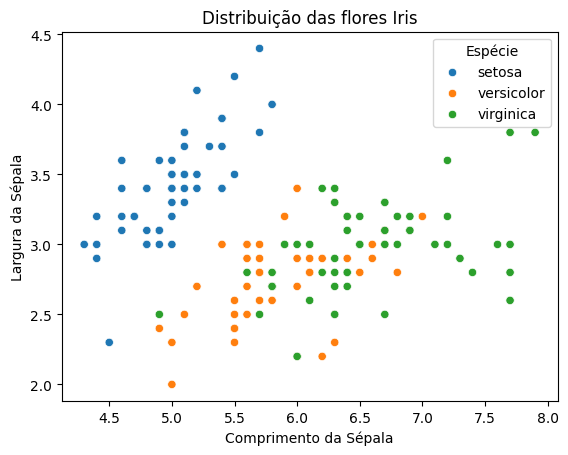

In [12]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y])
plt.xlabel('Comprimento da Sépala')
plt.ylabel('Largura da Sépala')
plt.title('Distribuição das flores Iris')
plt.legend(title='Espécie')
plt.show()